1.Longevity
2.All of the above
3.pipeline_knn_param0= {'knn__n_neighbors':[3,5,7],'fr__k':[50,75]}
    pipeline_rbf_svm_param0 = {'svc__C':[0.01, 0.1, 1, 10, 100],'svc__gamma':[0.001,0.01,0.1,1],'fr__k':[50,75]}
4.svm_linear0 = GridSearchCV(estimator=svm.SVC(kernel='linear', gamma=1, C=1, probability=True,decision_function_shape='ovo'),param_grid = linear_svm_param0, scoring = 'accuracy', cv=kfold))
5.dt = DecisionTreeClassifier()

In [1]:
import os
import shutil

import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Proprocessing

In [2]:

dataset_folder = 'drift_dataset/'
output_folder = 'drift_dataset_processed/'
FileNameList = os.listdir(dataset_folder)
for fileName in FileNameList:
    file = open(dataset_folder+fileName, 'r')
    lines = file.readlines()
    file.close()
    file = open(output_folder+"processed_"+fileName, 'w')
    for line in lines:
        line = line.split(' ',1)
        classLabel = line[0].split(';')[0]
        newLine = classLabel+' '+line[1]
        file.write(newLine+'\n')
    file.close()



In [3]:
from sklearn.datasets import load_svmlight_file
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
x_train, y_train = load_svmlight_file(output_folder+"processed_batch1.dat")
x_train = x_train.toarray()
y_train = y_train.astype(int)
y_train = y_train-1
# y_train = lb.fit_transform(y_train)

In [4]:
print(x_train.shape)
print(y_train.shape)


(445, 128)
(445,)


In [5]:
print(type(x_train[0]))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [6]:
print(x_train[0])

[ 1.55961621e+04  1.86824500e+00  2.37160400e+00  2.80367800e+00
  7.51221300e+00 -2.73938800e+00 -3.34467100e+00 -4.84751200e+00
  1.53266914e+04  1.76852600e+00  2.26908500e+00  2.71337400e+00
  6.91572100e+00 -2.48832400e+00 -3.08221200e+00 -5.05697500e+00
  2.78938310e+03  2.75475900e+00  4.30440000e-01  6.49457000e-01
  1.79502900e+00 -4.26662000e-01 -5.84313000e-01 -1.43897600e+00
  2.58156860e+03  2.68062300e+00  3.99746000e-01  6.05065000e-01
  1.78670400e+00 -4.00115000e-01 -5.50743000e-01 -1.72861100e+00
  6.85399400e+02  1.68290400e+00  1.22736000e-01  2.23703000e-01
  5.84691000e-01 -1.38196000e-01 -2.36907000e-01 -7.81959000e-01
  7.97773800e+02  1.74248800e+00  1.52483000e-01  2.18904000e-01
  8.41862000e-01 -1.64646000e-01 -3.15720000e-01 -7.91447000e-01
  3.12884890e+03  3.60553700e+00  5.32422000e-01  7.63062000e-01
  2.11898300e+00 -5.57197000e-01 -8.09953000e-01 -2.34413000e+00
  3.13687780e+03  3.55516900e+00  5.35883000e-01  7.61388000e-01
  1.49924400e+00 -5.71480

In [7]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]


In [8]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import mutual_info_classif
from sklearn import neighbors

In [9]:
# from sklearn import datasets
# iris = datasets.load_iris()
#
# # X -> features, y -> label
# X = iris.data
# y = iris.target
#
# # dividing X, y into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
# print(y_test[0])

# Decision tree

In [10]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

# KNN

In [11]:
pipeline_knn_param0= {'knn__n_neighbors':[3,5,7],'fr__k':[50,75]}
knn = GridSearchCV(estimator=Pipeline([('fr',SelectKBest(score_func=mutual_info_classif,k=50)),('stdscaler',StandardScaler()),('knn',neighbors.KNeighborsClassifier(n_neighbors=3))]),param_grid = pipeline_knn_param0, scoring = 'accuracy', cv=kfold)
knn.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3, shuffle=True),
             estimator=Pipeline(steps=[('fr',
                                        SelectKBest(k=50,
                                                    score_func=<function mutual_info_classif at 0x000001ED4CB82040>)),
                                       ('stdscaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'fr__k': [50, 75], 'knn__n_neighbors': [3, 5, 7]},
             scoring='accuracy')

# svm_linear0

In [12]:
from sklearn import svm
linear_svm_param0 = {'C':[0.01, 0.1, 1, 10, 100]}
svm_linear0 = GridSearchCV(estimator=svm.SVC(kernel='linear', gamma=1, C=1, probability=True,decision_function_shape='ovo'),param_grid = linear_svm_param0, scoring = 'accuracy', cv=kfold)
svm_linear0.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3, shuffle=True),
             estimator=SVC(C=1, decision_function_shape='ovo', gamma=1,
                           kernel='linear', probability=True),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

# svm_linear

In [13]:
pipeline_linear_svm_param = {'svc__C':[0.01, 0.1, 1, 10, 100],'fr__k':[50,75]}
svm_linear = GridSearchCV(Pipeline([('fr',SelectKBest(score_func=mutual_info_classif,k=50)),
('stdscaler',StandardScaler()),
('svc',svm.SVC(kernel='linear', gamma=1, C=1, probability=True,decision_function_shape='ovo'))]), param_grid = pipeline_linear_svm_param, scoring = 'accuracy', cv=kfold)

svm_linear.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3, shuffle=True),
             estimator=Pipeline(steps=[('fr',
                                        SelectKBest(k=50,
                                                    score_func=<function mutual_info_classif at 0x000001ED4CB82040>)),
                                       ('stdscaler', StandardScaler()),
                                       ('svc',
                                        SVC(C=1, decision_function_shape='ovo',
                                            gamma=1, kernel='linear',
                                            probability=True))]),
             param_grid={'fr__k': [50, 75], 'svc__C': [0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(svm_linear, x_train, y_train, cv=5, scoring='accuracy')

array([0.96629213, 1.        , 0.98876404, 1.        , 0.93258427])

# svm_rbf

In [15]:

pipeline_rbf_svm_param0 = {'svc__C':[0.01, 0.1, 1, 10, 100],'svc__gamma':[0.001,0.01,0.1,1],'fr__k':[50,75]}
svm_rbf = GridSearchCV(estimator=Pipeline([('fr',SelectKBest(score_func=mutual_info_classif,k=50)),('stdscaler',StandardScaler()),('svc',svm.SVC(kernel='rbf', gamma=1, C=1, probability=True,decision_function_shape='ovo'))]),param_grid = pipeline_rbf_svm_param0, scoring = 'accuracy', cv=kfold)
svm_rbf.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=3, shuffle=True),
             estimator=Pipeline(steps=[('fr',
                                        SelectKBest(k=50,
                                                    score_func=<function mutual_info_classif at 0x000001ED4CB82040>)),
                                       ('stdscaler', StandardScaler()),
                                       ('svc',
                                        SVC(C=1, decision_function_shape='ovo',
                                            gamma=1, probability=True))]),
             param_grid={'fr__k': [50, 75], 'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

## 畫圖比較

In [16]:
x_test = []
y_test = []
for i in range(2,11):
    x_test_temp, y_test_temp = load_svmlight_file(output_folder+"processed_batch"+str(i)+".dat")
    x_test_temp = x_test_temp.toarray()
    y_test_temp = y_test_temp.astype(int)
    y_test_temp = y_test_temp-1
    x_test.append(x_test_temp)
    y_test.append(y_test_temp)
print(x_test[0].shape)
print(y_test[0].shape)
print(len(x_test))


(1244, 128)
(1244,)
9


In [17]:
from sklearn.metrics import accuracy_score

decision_tree_accuracy = []
knn_accuracy = []
linear_svm0_accuracy = []
linear_svm_accuracy = []
rbf_svm_accuracy = []



for i in range(len(x_test)):
    decision_tree_pred = dt.predict(x_test[i])
    decision_tree_accuracy.append(accuracy_score(y_test[i], decision_tree_pred))
    knn_pred = knn.predict(x_test[i])
    knn_accuracy.append(accuracy_score(y_test[i], knn_pred))
    linear_svm0_pred = svm_linear0.predict(x_test[i])
    linear_svm0_accuracy.append(accuracy_score(y_test[i], linear_svm0_pred))
    linear_svm_pred = svm_linear.predict(x_test[i])
    linear_svm_accuracy.append(accuracy_score(y_test[i], linear_svm_pred))
    rbf_svm_pred = svm_rbf.predict(x_test[i])
    rbf_svm_accuracy.append(accuracy_score(y_test[i], rbf_svm_pred))


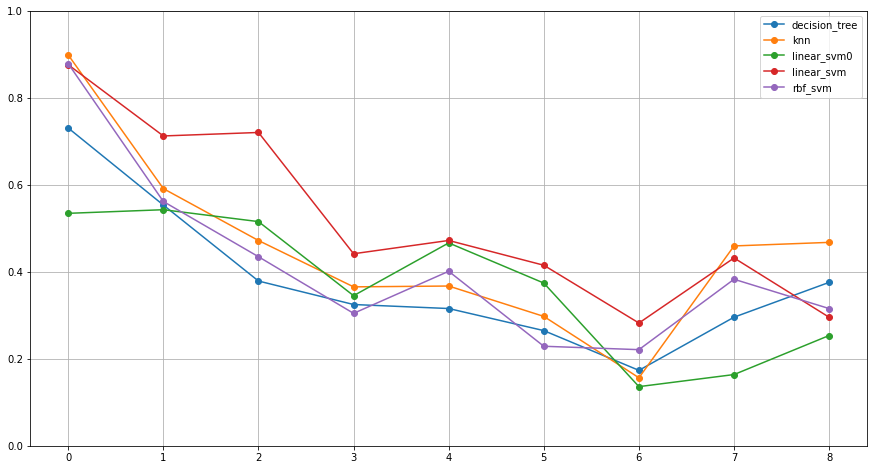

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.set_ylim([0.0, 1.0])
plt.plot(decision_tree_accuracy,marker='o', label='decision_tree')
plt.plot(knn_accuracy,marker='o', label='knn')
plt.plot(linear_svm0_accuracy,marker='o', label='linear_svm0')
plt.plot(linear_svm_accuracy,marker='o', label='linear_svm')
plt.plot(rbf_svm_accuracy,marker='o', label='rbf_svm')

plt.legend()
plt.grid()
plt.show()

# Neuruel network

In [19]:
from keras.utils import np_utils
x_train, y_train = load_svmlight_file(output_folder+"processed_batch1.dat")
x_train = x_train.toarray()
y_train = y_train.astype(int)
y_train = y_train-1
# y_train=np_utils.to_categorical(y_train)
print(x_train.shape)
print(y_train.shape)

(445, 128)
(445,)


In [20]:
print(x_train)

[[ 1.55961621e+04  1.86824500e+00  2.37160400e+00 ... -5.45079000e-01
  -9.02241000e-01 -2.65452900e+00]
 [ 2.64020704e+04  2.53240100e+00  5.41120900e+00 ... -8.89333000e-01
  -1.32350500e+00 -1.74922500e+00]
 [ 4.21035820e+04  3.45418900e+00  8.19817500e+00 ... -1.33455800e+00
  -1.99365900e+00 -2.34837000e+00]
 ...
 [ 1.07898233e+05  8.99476100e+00  2.51310790e+01 ... -8.31980000e-01
  -1.29934500e+00 -3.86036200e+00]
 [ 1.19795035e+05  9.58260600e+00  2.89447160e+01 ... -9.70762000e-01
  -1.69386800e+00 -2.72047200e+00]
 [ 1.40782298e+05  1.09753420e+01  3.55248020e+01 ... -1.28115700e+00
  -2.33268000e+00 -3.73508700e+00]]


In [21]:
print(y_train)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5]


In [34]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation

TRAIN_EPOCHS = 20

# Model 1

In [35]:

model_1 = Sequential([
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dense(512,activation='relu'),
    Dense(512,activation='relu'),
    Dropout(0.1),
    Dense(6,activation='softmax')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model_1.fit(X_train, y_train, epochs=10, batch_size=32)
model_1.fit(x_train, y_train, epochs=TRAIN_EPOCHS)

Epoch 1/20
14/14 [==============================] - 0s 6ms/step - loss: 0.9008 - accuracy: 0.7034
Epoch 2/20
14/14 [==============================] - 0s 7ms/step - loss: 0.3458 - accuracy: 0.8876
Epoch 3/20
14/14 [==============================] - 0s 4ms/step - loss: 0.3335 - accuracy: 0.8674
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 0.4339 - accuracy: 0.8539
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8607
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2796 - accuracy: 0.8764
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9348
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: 0.1963 - accuracy: 0.9169
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9101
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2866 - accuracy: 0.8899
Epoch 11/20
14/14 [

# Model 2

In [36]:
model_2 = Sequential([
    Dense(128, input_shape=(128,), activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Dense(6,activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_2.fit(x_train, y_train, epochs=TRAIN_EPOCHS)

Epoch 1/20
14/14 [==============================] - 0s 1ms/step - loss: 3168.4377 - accuracy: 0.4831
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 525.6407 - accuracy: 0.6494
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 317.0171 - accuracy: 0.8045
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 154.4731 - accuracy: 0.8157
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 139.2986 - accuracy: 0.8225
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 194.6250 - accuracy: 0.8449
Epoch 7/20
14/14 [==============================] - 0s 1ms/step - loss: 331.6747 - accuracy: 0.8494
Epoch 8/20
14/14 [==============================] - 0s 2ms/step - loss: 106.0639 - accuracy: 0.8719
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: 38.2641 - accuracy: 0.9191
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 29.6182 - accuracy: 0.9416


# Model 3

In [37]:
model_3 = Sequential([
    Dense(128, input_shape=(128,), activation='relu'),
    BatchNormalization(),
    Activation('relu'),
    Dense(512,activation='relu'),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(6,activation='softmax')
])

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_3.fit(x_train, y_train, epochs=TRAIN_EPOCHS)

Epoch 1/20
14/14 [==============================] - 0s 2ms/step - loss: 1.1291 - accuracy: 0.6607
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.5978 - accuracy: 0.8854
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8854
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8989
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2124 - accuracy: 0.9258
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9169
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2292 - accuracy: 0.9101
Epoch 8/20
14/14 [==============================] - 0s 2ms/step - loss: 0.2297 - accuracy: 0.9236
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: 0.1747 - accuracy: 0.9416
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.9618
Epoch 11/20
14/14 [

# Model 4

In [38]:
model_4 = Sequential([
    Dense(128, input_shape=(128,), activation='relu'),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dense(32,activation='relu'),
    Dropout(0.1),
    Dense(6,activation='softmax')
])

model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_4.fit(x_train, y_train, epochs=TRAIN_EPOCHS)

Epoch 1/20
14/14 [==============================] - 0s 2ms/step - loss: 2140.3462 - accuracy: 0.2112
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 404.3503 - accuracy: 0.3955
Epoch 3/20
14/14 [==============================] - 0s 2ms/step - loss: 193.0759 - accuracy: 0.5483
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 127.8397 - accuracy: 0.6539
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 93.3993 - accuracy: 0.7596
Epoch 6/20
14/14 [==============================] - 0s 2ms/step - loss: 78.0919 - accuracy: 0.7685
Epoch 7/20
14/14 [==============================] - 0s 2ms/step - loss: 46.8006 - accuracy: 0.8270
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: 44.1117 - accuracy: 0.8337
Epoch 9/20
14/14 [==============================] - 0s 2ms/step - loss: 33.1581 - accuracy: 0.8517
Epoch 10/20
14/14 [==============================] - 0s 2ms/step - loss: 27.8500 - accuracy: 0.8674
Epoc

## 畫圖比較

In [39]:
model_1_accuracy = []
model_2_accuracy = []
model_3_accuracy = []
model_4_accuracy = []

for i in range(len(x_test)):
    model_1_evaluate = model_1.evaluate(x_test[i], y_test[i])
    model_1_accuracy.append(model_1_evaluate[1])
    model_2_evaluate = model_2.evaluate(x_test[i], y_test[i])
    model_2_accuracy.append(model_2_evaluate[1])
    model_3_evaluate = model_3.evaluate(x_test[i], y_test[i])
    model_3_accuracy.append(model_3_evaluate[1])
    model_4_evaluate = model_4.evaluate(x_test[i], y_test[i])
    model_4_accuracy.append(model_4_evaluate[1])

113/113 [==============================] - 0s 1ms/step - loss: 176.2261 - accuracy: 0.3078


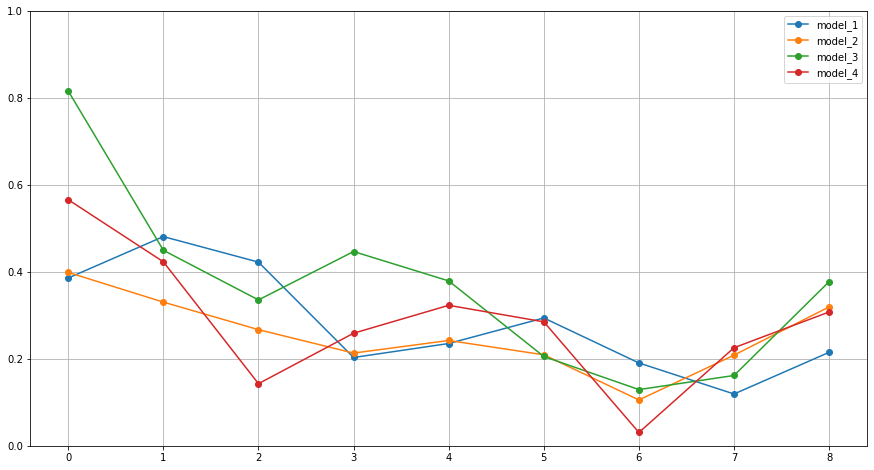

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.set_ylim([0.0, 1.0])
plt.plot(model_1_accuracy,marker='o', label='model_1')
plt.plot(model_2_accuracy,marker='o', label='model_2')
plt.plot(model_3_accuracy,marker='o', label='model_3')
plt.plot(model_4_accuracy,marker='o', label='model_4')

plt.legend()
plt.grid()
plt.show()